In [ ]:
using DataFrames, CSV
using Plots, LaTeXStrings

: 

In [10]:
PayoffDict_df = DataFrame(CSV.File("../data/PayoffDict_dev_pays_timing.csv"))
PayoffArrays_df = DataFrame(CSV.File("../data/PayoffArrays_dev_pays_timing.csv"))
RepeatsTable_df = DataFrame(CSV.File("../data/RepeatsTable_dev_pays_timing.csv"))
DeviationProfiles_df = DataFrame(CSV.File("../data/DeviationProfiles_dev_pays_timing.csv"))
WeightedPayoffs_df = DataFrame(CSV.File("../data/WeightedPayoffs_dev_pays_timing.csv"))
LogProbabilities_df = DataFrame(CSV.File("../data/LogProbabilities_dev_pays_timing.csv"))
GPUArrays_df = DataFrame(CSV.File("../data/GPUArrays_dev_pays_timing.csv"))

,players,actions,batch_size,min_time
,Int64,Int64,Int64,Float64
1,8,4,1,0.0630778
2,6,4,1,0.0658658
3,12,4,1,0.0779103
4,16,4,1,0.0803111
5,32,4,1,0.098091
6,4,4,1,0.0642224
7,48,4,1,0.100562
8,24,4,1,0.086741
9,64,4,1,0.149171


In [4]:
plot(xaxis=:log, yaxis=:log, legend=(0.1,0.96), legend_font_pointsize=7)
plot!(xlabel=L"Number of Players, $P$ (log scale)", ylabel="Time in Seconds (log scale)")#, title="Time to Compute Deviation Payoffs")

a = 4
plot_kwds = Dict(:markershape=>:circle, :markersize=>3, :linewidth=>2)
PayoffDict_times =  sort(PayoffDict_df[PayoffDict_df.actions .== a, :])
plot!(PayoffDict_times.players, PayoffDict_times.min_time, label="Payoff Dictionary"; plot_kwds...)
PayoffArrays_times =  sort(PayoffArrays_df[PayoffArrays_df.actions .== a, :])
plot!(PayoffArrays_times.players, PayoffArrays_times.min_time, label="Array Vectorization"; plot_kwds...)
RepeatsTable_times =  sort(RepeatsTable_df[RepeatsTable_df.actions .== a, :])
plot!(RepeatsTable_times.players, RepeatsTable_times.min_time, label="Pre-Computing Reps."; plot_kwds...)
DeviationProfiles_times =  sort(DeviationProfiles_df[DeviationProfiles_df.actions .== a, :])
plot!(DeviationProfiles_times.players, DeviationProfiles_times.min_time, label="Opponent Configs"; plot_kwds...)
WeightedPayoffs_times =  sort(WeightedPayoffs_df[WeightedPayoffs_df.actions .== a, :])
plot!(WeightedPayoffs_times.players, WeightedPayoffs_times.min_time, label="Pre-Weighting by Reps."; plot_kwds...)
LogProbabilities_times =  sort(LogProbabilities_df[LogProbabilities_df.actions .== a .&& LogProbabilities_df.batch_size .== 1, :])
plot!(LogProbabilities_times.players, LogProbabilities_times.min_time, label="Log Transform"; plot_kwds...)
GPUArrays_times =  sort(GPUArrays_df[GPUArrays_df.actions .== a .&& GPUArrays_df.batch_size .== 1, :])
plot!(GPUArrays_times.players, GPUArrays_times.min_time, label="GPU Acceleration"; plot_kwds...)
Batch64_times =  sort(GPUArrays_df[GPUArrays_df.actions .== a .&& GPUArrays_df.batch_size .== 64, :])
plot!(Batch64_times.players, Batch64_times.min_time, label="Batch Processing: 64"; plot_kwds...)

annotate!(250, 0.025, text(L"A = 4", 12))
annotate!(250, 0.005, text(L"1024\;\textrm{mixtures}", 12))
ylims!((10^-3,10^3.5))
plot!(yticks=([10.0^i for i=-3:3],[10.0^i for i=-3:3]))
xlims!((3.9,394))
plot!(xticks=([2^i for i=2:9],[2^i for i=2:9]))

savefig("../figures/deviation_payoff_timing_4A.png")

In [7]:
plot(xaxis=:log, yaxis=:log, legend=(0.1,0.96), legend_font_pointsize=7)
plot!(xlabel=L"Number of Players, $P$ (log scale)", ylabel="Time in Seconds (log scale)", title="Time to Compute Deviation Payoffs")

a = 6
plot_kwds = Dict(:markershape=>:circle, :markersize=>3, :linewidth=>2)
PayoffDict_times =  sort(PayoffDict_df[PayoffDict_df.actions .== a, :])
plot!(PayoffDict_times.players, PayoffDict_times.min_time, label="Payoff Dictionary"; plot_kwds...)
PayoffArrays_times =  sort(PayoffArrays_df[PayoffArrays_df.actions .== a, :])
plot!(PayoffArrays_times.players, PayoffArrays_times.min_time, label="Array Vectorization"; plot_kwds...)
RepeatsTable_times =  sort(RepeatsTable_df[RepeatsTable_df.actions .== a, :])
plot!(RepeatsTable_times.players, RepeatsTable_times.min_time, label="Pre-Computing Reps."; plot_kwds...)
DeviationProfiles_times =  sort(DeviationProfiles_df[DeviationProfiles_df.actions .== a, :])
plot!(DeviationProfiles_times.players, DeviationProfiles_times.min_time, label="Opponent Configs"; plot_kwds...)
WeightedPayoffs_times =  sort(WeightedPayoffs_df[WeightedPayoffs_df.actions .== a, :])
plot!(WeightedPayoffs_times.players, WeightedPayoffs_times.min_time, label="Pre-Weighting by Reps."; plot_kwds...)
LogProbabilities_times =  sort(LogProbabilities_df[LogProbabilities_df.actions .== a .&& LogProbabilities_df.batch_size .== 1, :])
plot!(LogProbabilities_times.players, LogProbabilities_times.min_time, label="Log Transform"; plot_kwds...)
GPUArrays_times =  sort(GPUArrays_df[GPUArrays_df.actions .== a .&& GPUArrays_df.batch_size .== 1, :])
plot!(GPUArrays_times.players, GPUArrays_times.min_time, label="GPU Acceleration"; plot_kwds...)
Batch64_times =  sort(GPUArrays_df[GPUArrays_df.actions .== a .&& GPUArrays_df.batch_size .== 64, :])
plot!(Batch64_times.players, Batch64_times.min_time, label="Batch Processing: 64"; plot_kwds...)

annotate!(44, 0.025, text(L"A = 6", 12))
annotate!(44, 0.005, text(L"1024\;\textrm{mixtures}", 12))
ylims!((10^-3,10^4))
plot!(yticks=([10.0^i for i=-3:4],[10.0^i for i=-3:4]))
xlims!((3.92,65))
plot!(xticks=([2^i for i=2:6],[2^i for i=2:6]))

savefig("../figures/deviation_payoff_timing_6A.png")

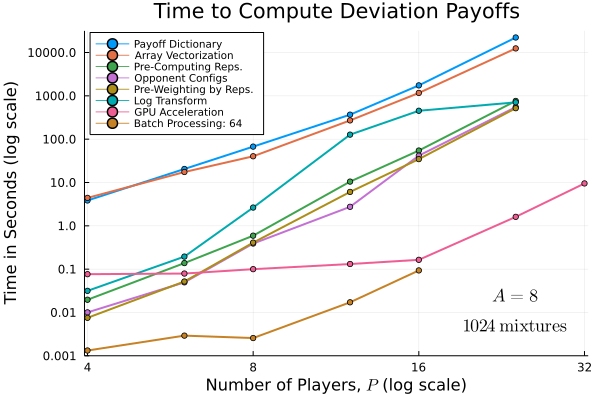

In [11]:
plot(xaxis=:log, yaxis=:log, legend=(0.1,0.96), legend_font_pointsize=7)
plot!(xlabel=L"Number of Players, $P$ (log scale)", ylabel="Time in Seconds (log scale)", title="Time to Compute Deviation Payoffs")

a = 8
plot_kwds = Dict(:markershape=>:circle, :markersize=>3, :linewidth=>2)
PayoffDict_times =  sort(PayoffDict_df[PayoffDict_df.actions .== a, :])
plot!(PayoffDict_times.players, PayoffDict_times.min_time, label="Payoff Dictionary"; plot_kwds...)
PayoffArrays_times =  sort(PayoffArrays_df[PayoffArrays_df.actions .== a, :])
plot!(PayoffArrays_times.players, PayoffArrays_times.min_time, label="Array Vectorization"; plot_kwds...)
RepeatsTable_times =  sort(RepeatsTable_df[RepeatsTable_df.actions .== a, :])
plot!(RepeatsTable_times.players, RepeatsTable_times.min_time, label="Pre-Computing Reps."; plot_kwds...)
DeviationProfiles_times =  sort(DeviationProfiles_df[DeviationProfiles_df.actions .== a, :])
plot!(DeviationProfiles_times.players, DeviationProfiles_times.min_time, label="Opponent Configs"; plot_kwds...)
WeightedPayoffs_times =  sort(WeightedPayoffs_df[WeightedPayoffs_df.actions .== a, :])
plot!(WeightedPayoffs_times.players, WeightedPayoffs_times.min_time, label="Pre-Weighting by Reps."; plot_kwds...)
LogProbabilities_times =  sort(LogProbabilities_df[LogProbabilities_df.actions .== a .&& LogProbabilities_df.batch_size .== 1, :])
plot!(LogProbabilities_times.players, LogProbabilities_times.min_time, label="Log Transform"; plot_kwds...)
GPUArrays_times =  sort(GPUArrays_df[GPUArrays_df.actions .== a .&& GPUArrays_df.batch_size .== 1, :])
plot!(GPUArrays_times.players, GPUArrays_times.min_time, label="GPU Acceleration"; plot_kwds...)
Batch64_times =  sort(GPUArrays_df[GPUArrays_df.actions .== a .&& GPUArrays_df.batch_size .== 64, :])
plot!(Batch64_times.players, Batch64_times.min_time, label="Batch Processing: 64"; plot_kwds...)

annotate!(24, 0.025, text(L"A = 8", 12))
annotate!(24, 0.005, text(L"1024\;\textrm{mixtures}", 12))
ylims!((10^-3,10^4.5))
plot!(yticks=([10.0^i for i=-3:4],[10.0^i for i=-3:4]))
xlims!((3.95,32.5))
plot!(xticks=([2^i for i=2:6],[2^i for i=2:6]))

# savefig("../figures/deviation_payoff_timing_8A.png")